In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Data/NYCTaxiFares.csv")

In [3]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
df["fare_amount"].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [5]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [7]:
df["dist_km"] = haversine_distance(df, "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude")

In [8]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [9]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [12]:
my_time = df["pickup_datetime"][0]

In [14]:
df["EDTdate"] = df["pickup_datetime"] - pd.Timedelta(hours=4)

In [17]:
df["Hour"] = df["EDTdate"].dt.hour

In [18]:
df["AMorPM"] = np.where(df["Hour"] < 12, "am", "pm")

In [20]:
df["Weekday"] = df["EDTdate"].dt.strftime("%a")

In [21]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [23]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [25]:
cat_cols = ["Hour", "AMorPM", "Weekday"]
cont_cols = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count", "dist_km"]

In [26]:
y_col = ["fare_amount"]

In [29]:
for cat in cat_cols:
    df[cat] = df[cat].astype("category")

In [30]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [39]:
df["Weekday"].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [40]:
hr = df["Hour"].cat.codes.values
am_pm = df["AMorPM"].cat.codes.values
wkdy = df["Weekday"].cat.codes.values

In [41]:
cats = np.stack([hr, am_pm, wkdy], axis=1)

In [42]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [43]:
cats = torch.tensor(cats, dtype=torch.int64)

In [44]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)

In [46]:
conts = torch.tensor(conts, dtype=torch.float)

In [47]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [51]:
y = torch.tensor(df[y_col].values, dtype=torch.float)

In [52]:
cats.shape

torch.Size([120000, 3])

In [53]:
conts.shape

torch.Size([120000, 6])

In [54]:
y.shape

torch.Size([120000, 1])

In [55]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [56]:
cat_szs

[24, 2, 7]

In [57]:
emb_szs = [(size, min(50, (size + 1) // 2)) for size in cat_szs]

In [58]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [59]:
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])

In [60]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [65]:
class TabularModel(nn.Module):
    
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_embs = sum([nf for ni, nf in emb_szs])
        n_in = n_embs + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)
        
        
    def forward(self, x_cat, x_cont):
        embeddings = []
        
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
        
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x



In [66]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200, 100], p=0.4)

In [67]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [68]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [69]:
batch_size = 60000
test_size = int(batch_size * 0.2)

In [70]:
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size: batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size: batch_size]

In [71]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size: batch_size]

In [72]:
len(cat_train)

48000

In [73]:
len(con_train)

48000

In [74]:
len(cat_test)

12000

In [75]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i += 1
    
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i % 10 == 1:
        print(f"epoch: {i} loss is {loss}")
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

duration = time.time() - start_time
print(f"Training took {duration / 60} minutes")

epoch: 1 loss is 12.586901664733887
epoch: 11 loss is 11.68663215637207
epoch: 21 loss is 11.121232032775879
epoch: 31 loss is 10.733573913574219
epoch: 41 loss is 10.460502624511719
epoch: 51 loss is 10.234916687011719
epoch: 61 loss is 10.02806282043457
epoch: 71 loss is 9.849141120910645
epoch: 81 loss is 9.635137557983398
epoch: 91 loss is 9.413456916809082
epoch: 101 loss is 9.172782897949219
epoch: 111 loss is 8.894377708435059
epoch: 121 loss is 8.578545570373535
epoch: 131 loss is 8.216514587402344
epoch: 141 loss is 7.808032512664795
epoch: 151 loss is 7.365096569061279
epoch: 161 loss is 6.919506549835205
epoch: 171 loss is 6.456977367401123
epoch: 181 loss is 5.96727991104126
epoch: 191 loss is 5.46106481552124
epoch: 201 loss is 5.016634941101074
epoch: 211 loss is 4.630359649658203
epoch: 221 loss is 4.341358661651611
epoch: 231 loss is 4.098092079162598
epoch: 241 loss is 3.907881259918213
epoch: 251 loss is 3.885535955429077
epoch: 261 loss is 3.7979650497436523
epoch: 2

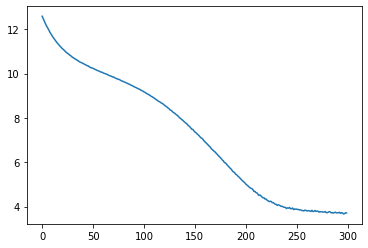

In [76]:
plt.plot(range(epochs), losses)

In [77]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [78]:
loss

tensor(3.6343)

In [81]:
for i in range(10):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f"{i}. PREDICTED: {y_val[i].item(): 8.2f} TRUE: {y_test[i].item(): 8.2f} DIFF: {diff: 8.2f}")

0. PREDICTED:     5.48 TRUE:     2.90 DIFF:     2.58
1. PREDICTED:    13.27 TRUE:     5.70 DIFF:     7.57
2. PREDICTED:     7.99 TRUE:     7.70 DIFF:     0.29
3. PREDICTED:    14.53 TRUE:    12.50 DIFF:     2.03
4. PREDICTED:     7.12 TRUE:     4.10 DIFF:     3.02
5. PREDICTED:     6.12 TRUE:     5.30 DIFF:     0.82
6. PREDICTED:     2.04 TRUE:     3.70 DIFF:     1.66
7. PREDICTED:    19.03 TRUE:    14.50 DIFF:     4.53
8. PREDICTED:     5.31 TRUE:     5.70 DIFF:     0.39
9. PREDICTED:    13.84 TRUE:    10.10 DIFF:     3.74


In [82]:
torch.save(model.state_dict(), "TaxiModel.pt")

In [84]:
torch.__version__

'1.8.0'